In [1]:
#Importing required libraries
import pandas as pd
from string import digits
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\adil2\\Downloads\\customer_retention_dataset.csv")

In [3]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [4]:
#Display maximum rows and columns from the dataset
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

In [5]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you

In [6]:
#Replacing the unwanted details in the columns
df.columns = df.columns.str.replace('\t','')

In [7]:
#Removing the unwanted digits available in the column
r_d = str.maketrans('','',digits)
df.columns = df.columns.str.translate(r_d)
df.columns = df.columns.str.strip()

In [8]:
df.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,1,1,1,3,4,3,3,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Sn

In [9]:
#Checking the shape of the dataset
df.shape

(269, 71)

In [10]:
#Checking the null values in the dataset
df.isna().sum().any()

False

In [11]:
#Displaying the columns of the dataset
df.columns

Index(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How  do you abandon (selecting an items and leaving without making paymen

In [12]:
#Checking the counts in the Which city do you shop online from column
df['Which city do you shop online from?'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Which city do you shop online from?, dtype: int64

In [13]:
#Transforming the city name into numerical value using Label Encoder
le = LabelEncoder()
df1 = le.fit_transform(df['Which city do you shop online from?'])
pd.Series(df1)
df['Which city do you shop online from?'] = df1

In [14]:
df['Which city do you shop online from?'].value_counts()

2     58
4     43
9     40
0     37
6     27
3     18
10    18
5     12
7      9
8      5
1      2
Name: Which city do you shop online from?, dtype: int64

In [15]:
#Plotting the graph for Analysing the dataset
customer_personal_info = df[['Gender of respondent','Which city do you shop online from?','What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?','How many times you have made an online purchase in the past  year?']]

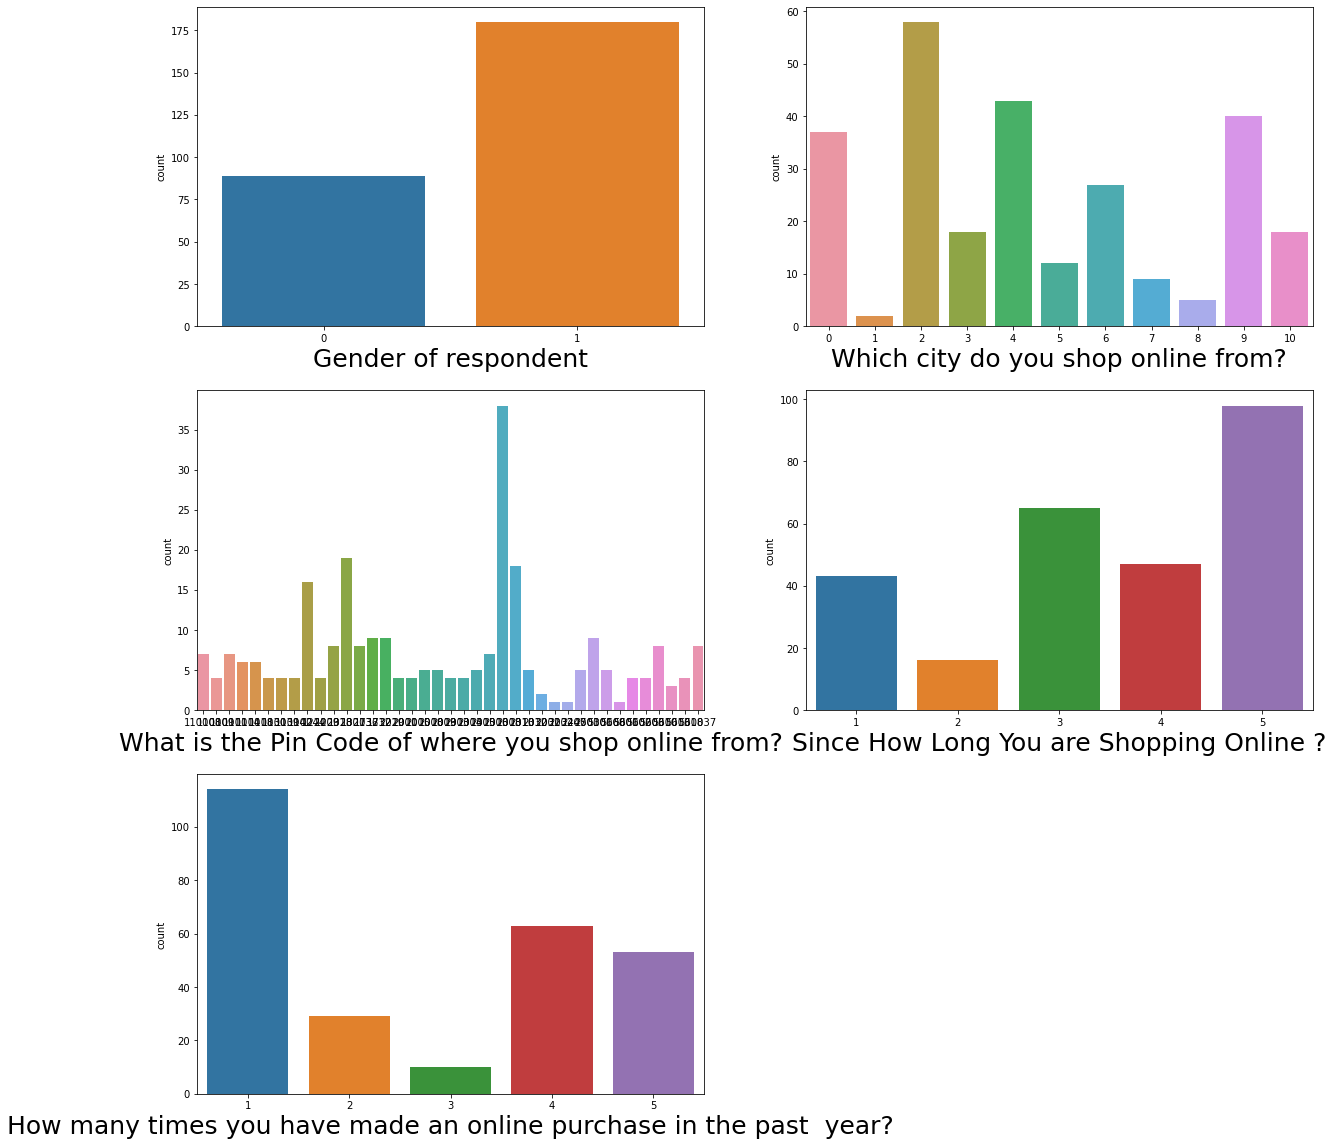

In [16]:
plt.figure(figsize = (20,20))
plt_num =1

for column in customer_personal_info:
    if plt_num<=5:
        sx = plt.subplot(3,2,plt_num)
        sns.countplot(customer_personal_info[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

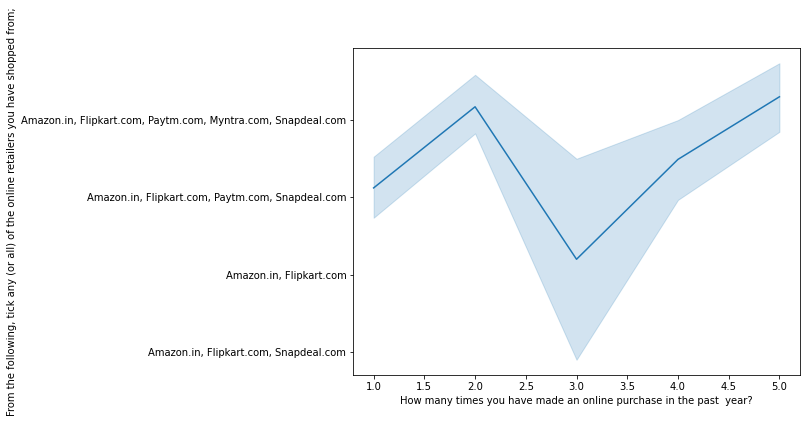

In [17]:
#Plotting lineplot for analysing the data
plt.figure(figsize=(8,6))
sns.lineplot(df['How many times you have made an online purchase in the past  year?'],df['From the following, tick any (or all) of the online retailers you have shopped from;'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

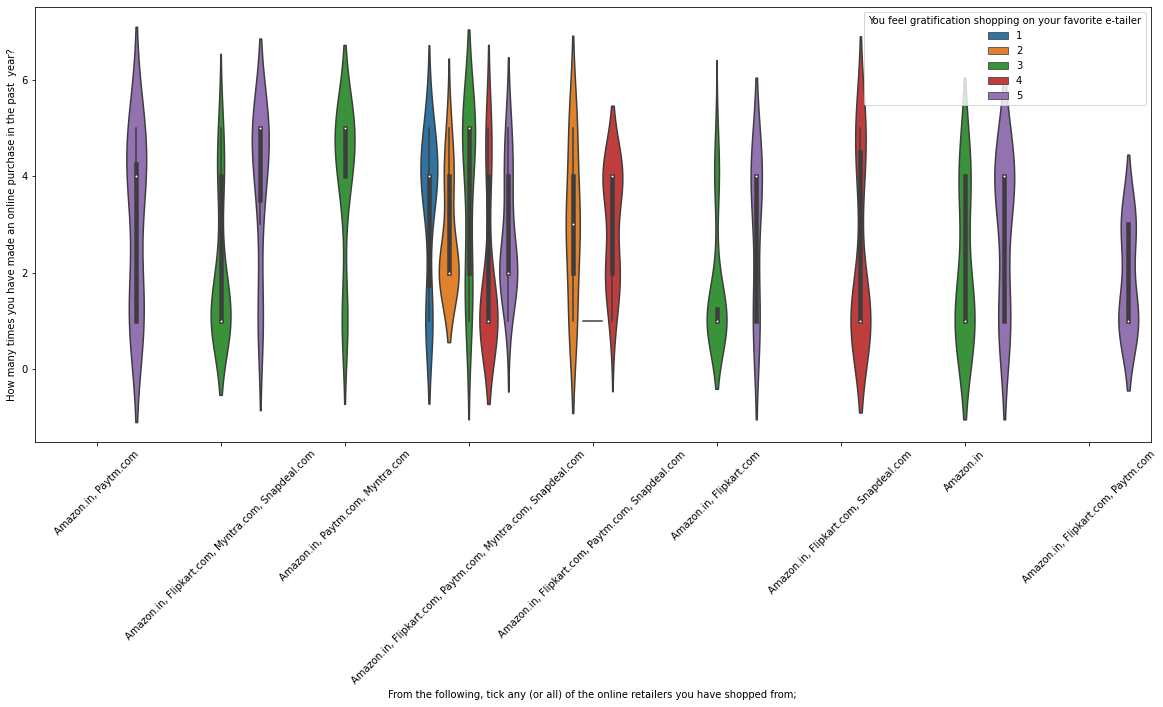

In [18]:
#Plotting the graph to analysing the dataset
plt.figure(figsize = (20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],df['How many times you have made an online purchase in the past  year?'],hue = df['You feel gratification shopping on your favorite e-tailer'])
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

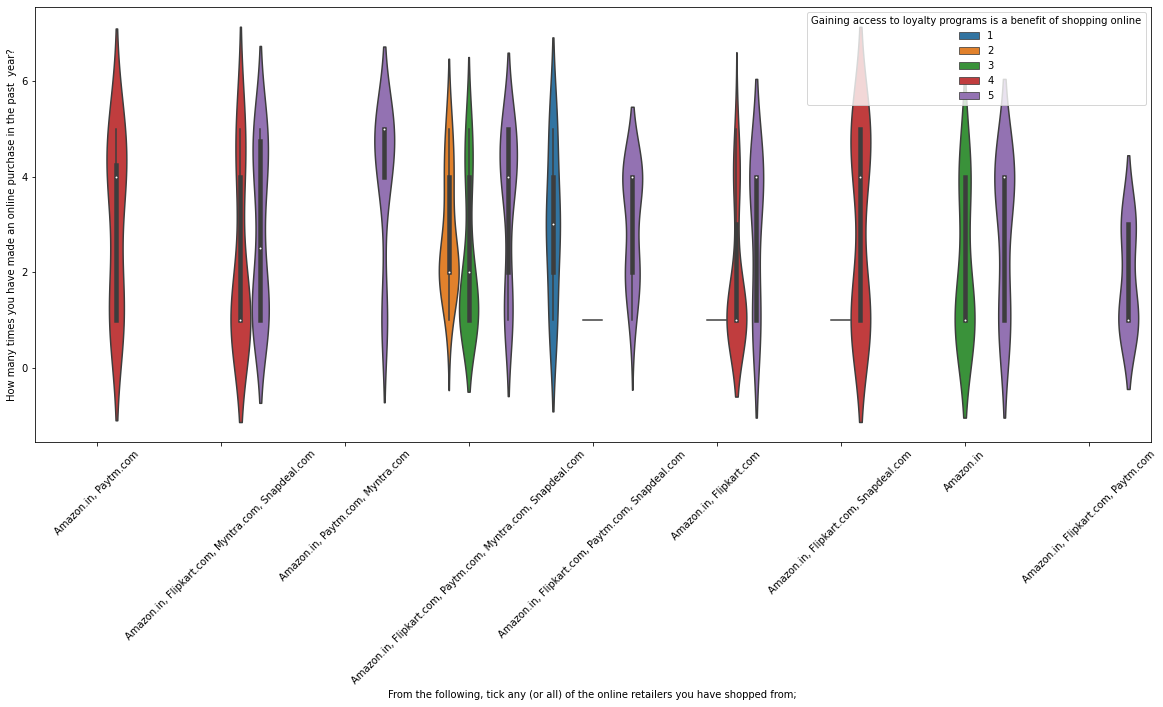

In [19]:
#plotting the graph for Analysing the dataset
plt.figure(figsize = (20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],df['How many times you have made an online purchase in the past  year?'],hue = df['Gaining access to loyalty programs is a benefit of shopping online'])
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

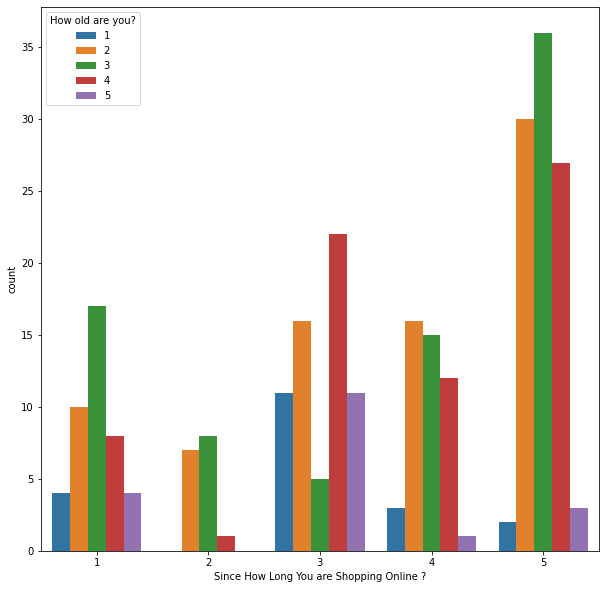

In [20]:
#plotting the graph for Analysing the dataset
plt.figure(figsize = (10,10))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue = df['How old are you?'])

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='Since How Long You are Shopping Online ?'>

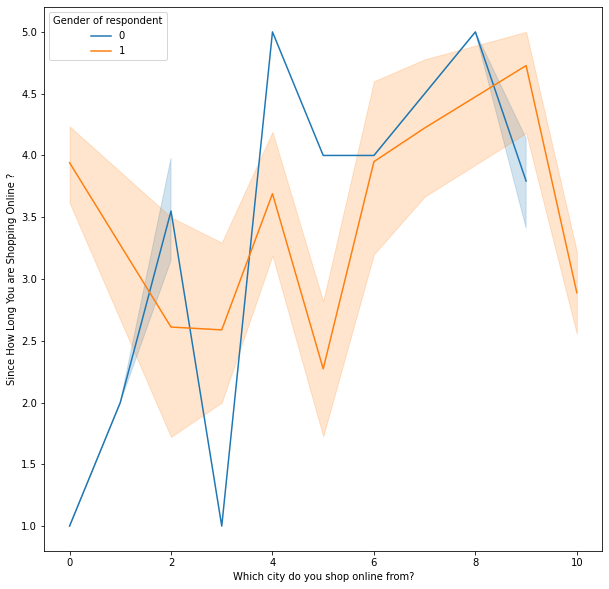

In [21]:
#plotting the graph for Analysing the dataset
plt.figure(figsize = (10,10))
sns.lineplot(df['Which city do you shop online from?'],df['Since How Long You are Shopping Online ?'],hue = df['Gender of respondent'])

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

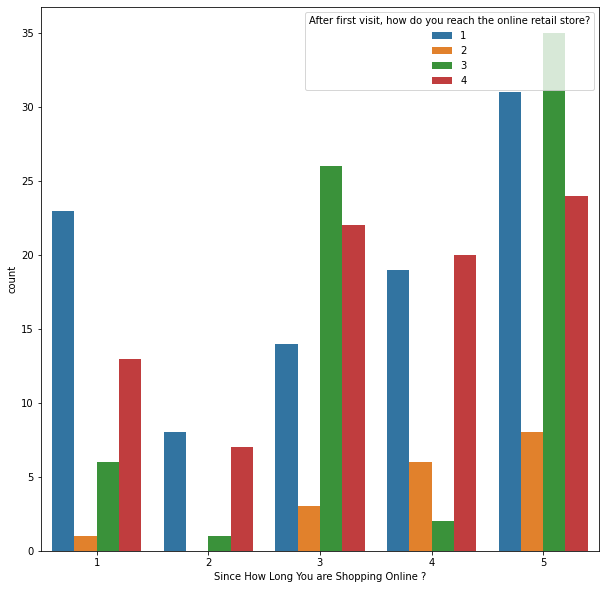

In [22]:
#plotting the graph for Analysing the dataset
plt.figure(figsize = (10,10))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue = df['After first visit, how do you reach the online retail store?'])

In [23]:
# For Analysing the E-Commerce performance using different columns 
website_performance = df[['Easy to use website or application','Visual appealing web-page layout',
                          'Wild variety of product on offer','Complete, relevant description information of products',
                          'Complete, relevant description information of products','Fast loading website speed of website and application',
                          'Fast loading website speed of website and application','Reliability of the website or application',
                          'Quickness to complete purchase','Availability of several payment options', 'Speedy order delivery',
                          'Privacy of customers’ information','Security of customer financial information','Perceived Trustworthiness',
                          'Presence of online assistance through multi-channel']]

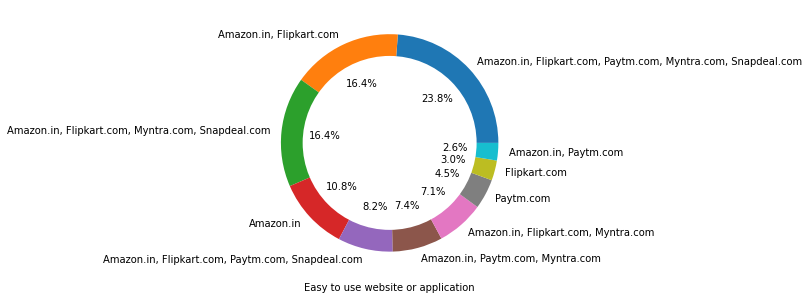

<Figure size 432x288 with 0 Axes>

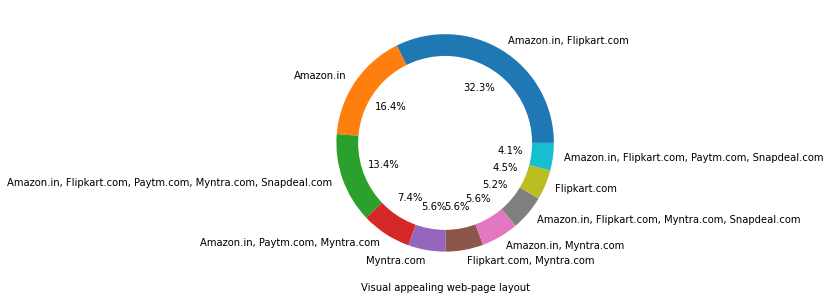

<Figure size 432x288 with 0 Axes>

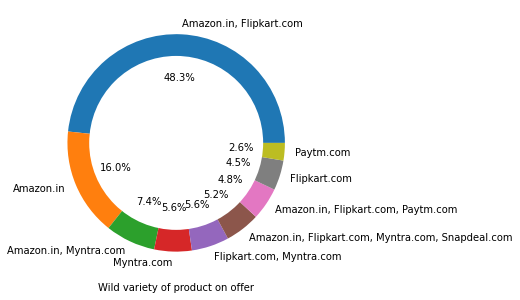

<Figure size 432x288 with 0 Axes>

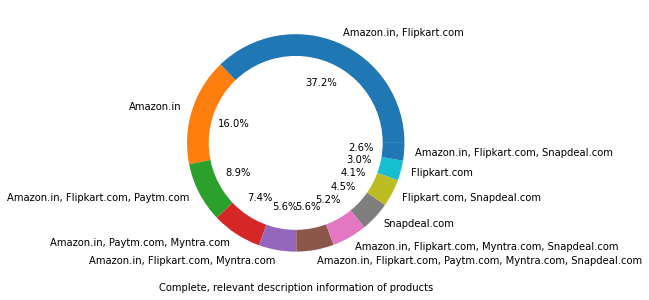

<Figure size 432x288 with 0 Axes>

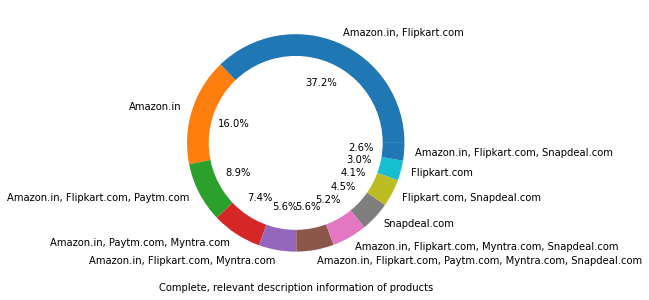

<Figure size 432x288 with 0 Axes>

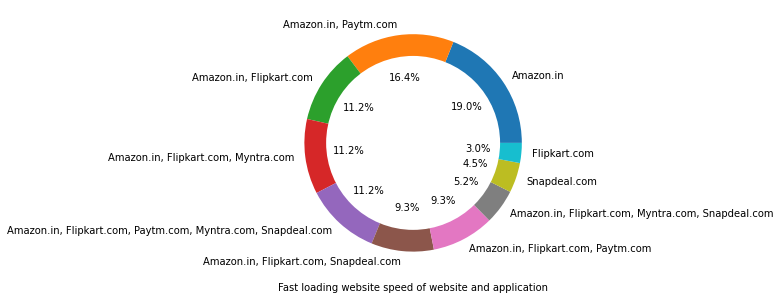

<Figure size 432x288 with 0 Axes>

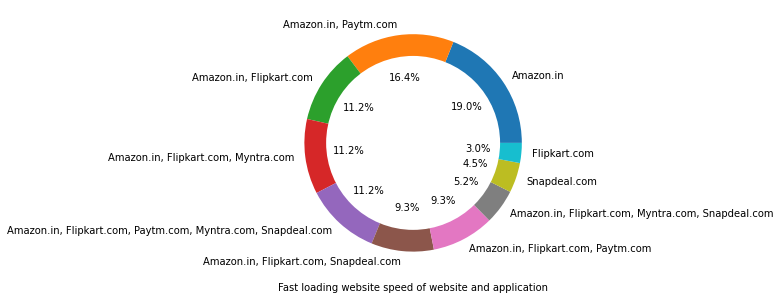

<Figure size 432x288 with 0 Axes>

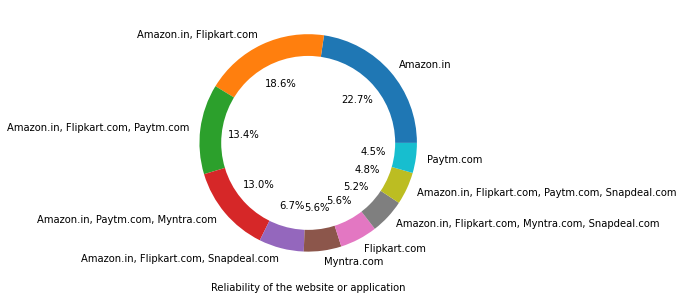

<Figure size 432x288 with 0 Axes>

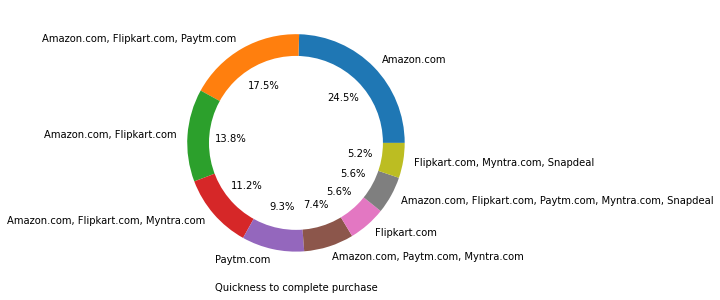

<Figure size 432x288 with 0 Axes>

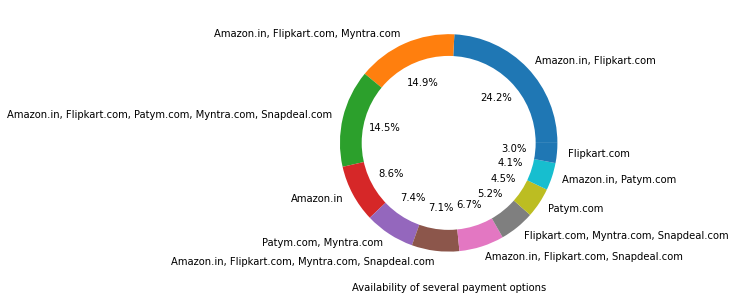

<Figure size 432x288 with 0 Axes>

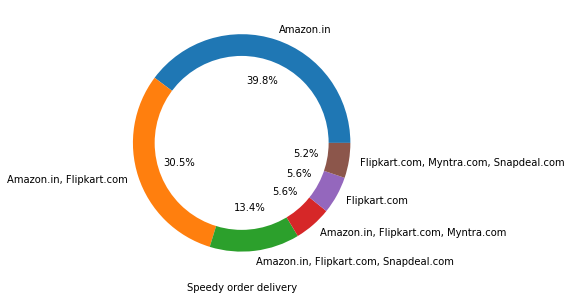

<Figure size 432x288 with 0 Axes>

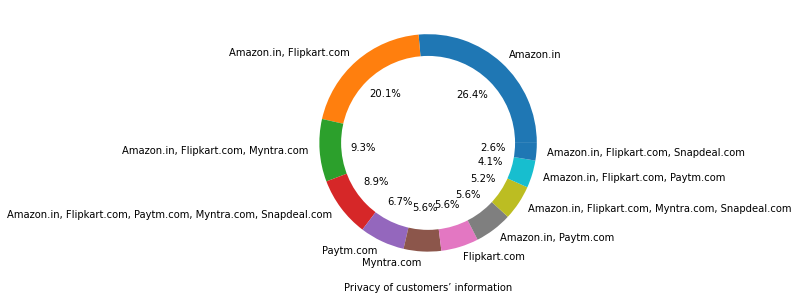

<Figure size 432x288 with 0 Axes>

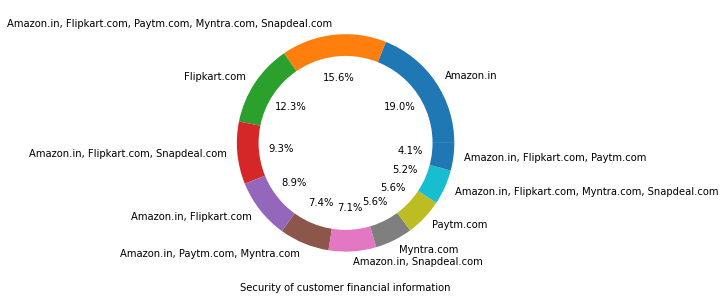

<Figure size 432x288 with 0 Axes>

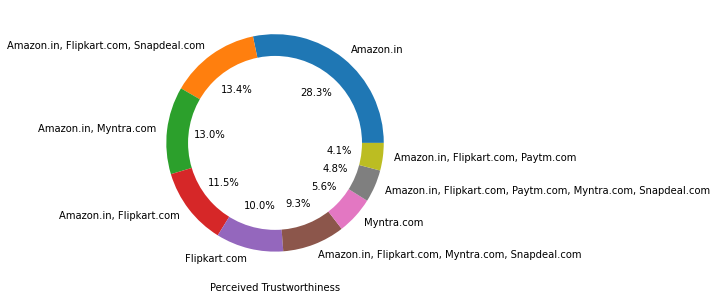

<Figure size 432x288 with 0 Axes>

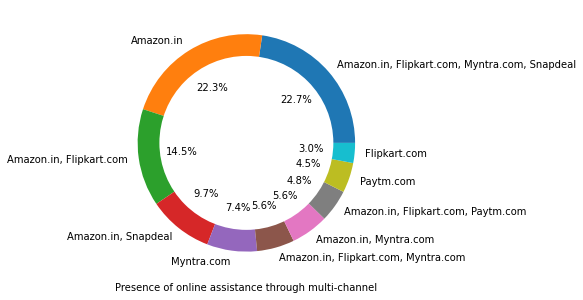

<Figure size 432x288 with 0 Axes>

In [24]:
#To Analyse the Website performance plotting the graph
for data in website_performance:
    plt.figure(figsize = (6,5))
    df[data].value_counts().plot.pie(autopct = '%1.1f%%')
    center = plt.Circle((0,0),0.8,fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(center)
    plt.xlabel(data)
    plt.ylabel('')
    plt.figure()

<AxesSubplot:xlabel='Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

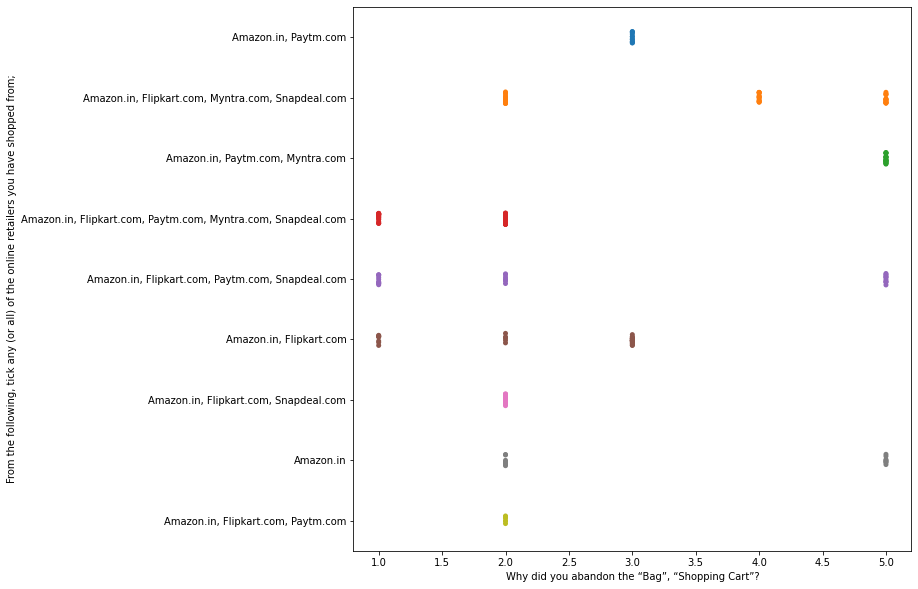

In [25]:
#plotting the graph to check the from which the customer abondoned the product while purchasing or abondoned from the cart
plt.figure(figsize = (10,10))
sns.stripplot(df['Why did you abandon the “Bag”, “Shopping Cart”?'],df['From the following, tick any (or all) of the online retailers you have shopped from;'])

In [26]:
#Plotting the graph to the Negatives things about each E-Commerce company
Negative_service = df[['Longer time to get logged in (promotion, sales period)','Longer time in displaying graphics and photos (promotion, sales period)',
                      'Late declaration of price (promotion, sales period)','Longer page loading time (promotion, sales period)',
                      'Limited mode of payment on most products (promotion, sales period)','Longer delivery period',
                      'Change in website/Application design','Frequent disruption when moving from one page to another']]

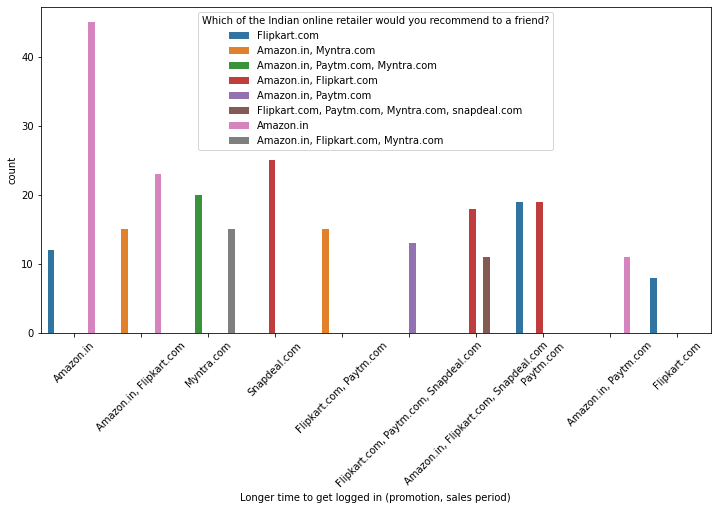

<Figure size 432x288 with 0 Axes>

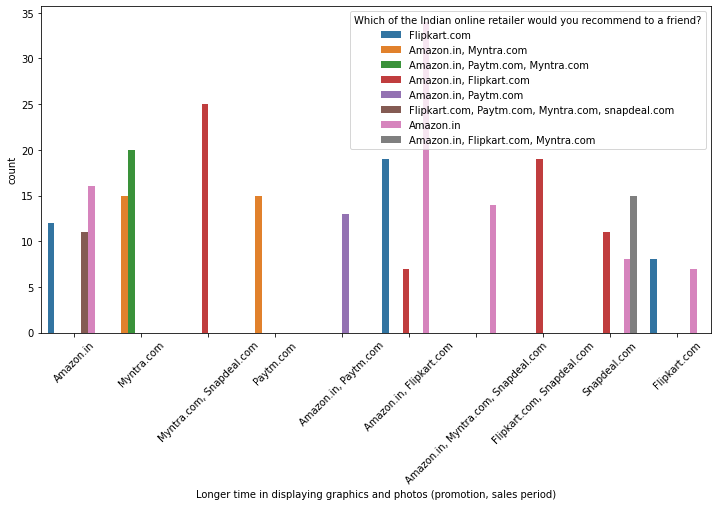

<Figure size 432x288 with 0 Axes>

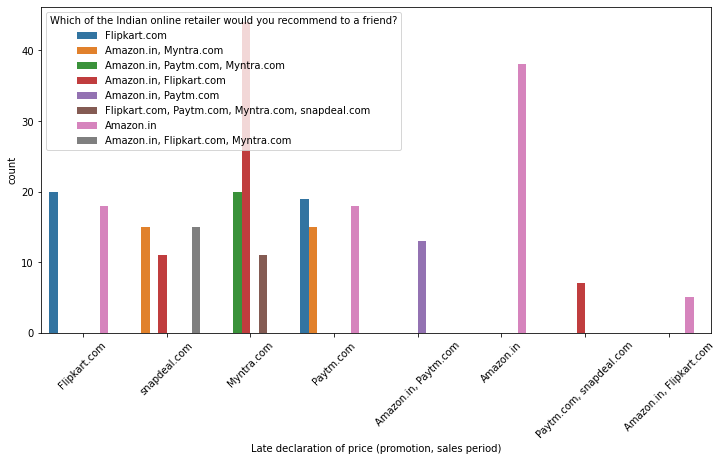

<Figure size 432x288 with 0 Axes>

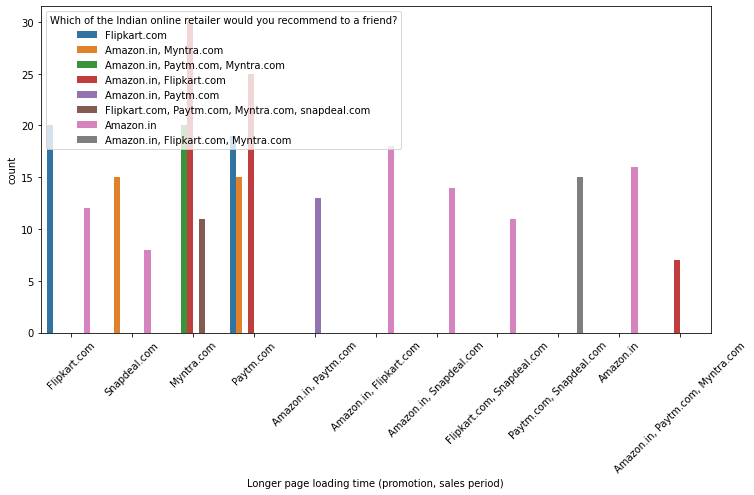

<Figure size 432x288 with 0 Axes>

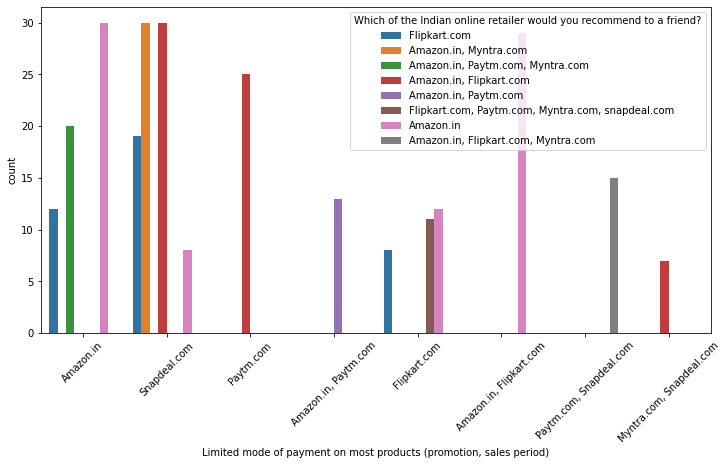

<Figure size 432x288 with 0 Axes>

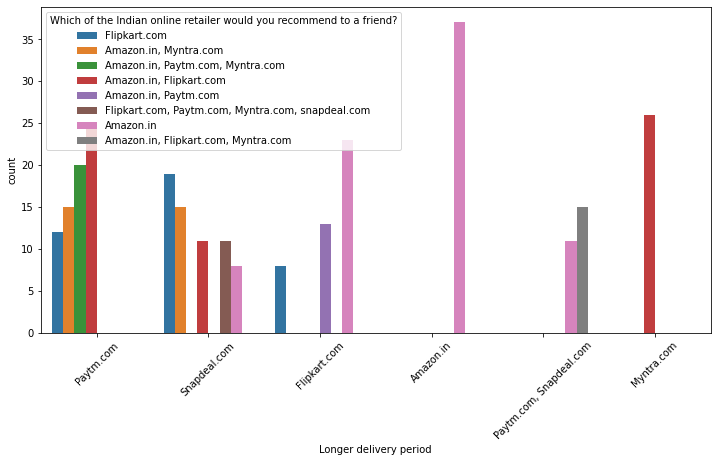

<Figure size 432x288 with 0 Axes>

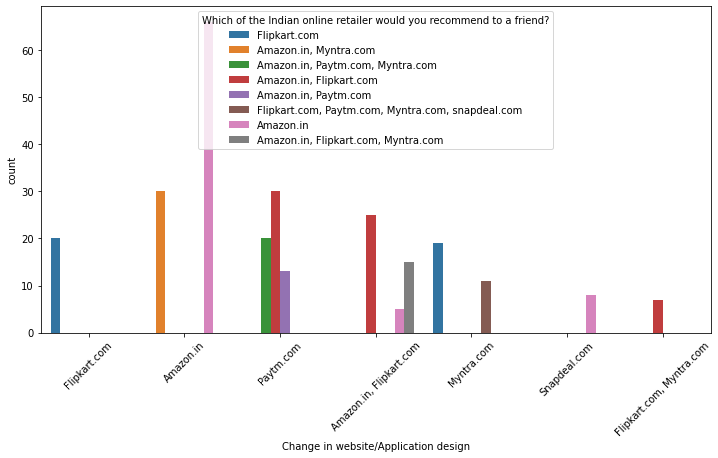

<Figure size 432x288 with 0 Axes>

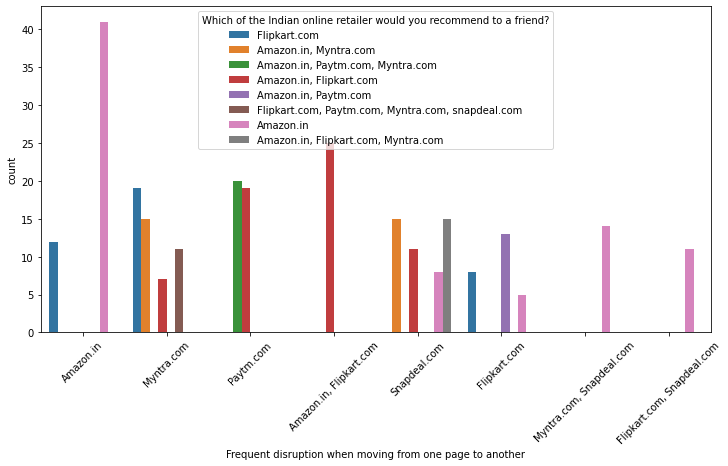

<Figure size 432x288 with 0 Axes>

In [27]:
for data in Negative_service:
    plt.figure(figsize = (12,6))
    sns.countplot(df[data],hue = df['Which of the Indian online retailer would you recommend to a friend?'])
    plt.xticks(rotation = 45)
    plt.figure()

In [28]:
#Splitting the Labels and features
x = df.drop(columns = ['Which of the Indian online retailer would you recommend to a friend?'])
y =df['Which of the Indian online retailer would you recommend to a friend?']

In [29]:
x.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before
0,0,3,2,110009,5,4,4,3,5,1,1,1,1,3,4,3,3,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Fl

In [30]:
y

0                                           Flipkart.com
1                                  Amazon.in, Myntra.com
2                       Amazon.in, Paytm.com, Myntra.com
3                                Amazon.in, Flipkart.com
4                                  Amazon.in, Myntra.com
5                                   Amazon.in, Paytm.com
6      Flipkart.com, Paytm.com, Myntra.com, snapdeal.com
7                                              Amazon.in
8                                              Amazon.in
9                                           Flipkart.com
10                                             Amazon.in
11                               Amazon.in, Flipkart.com
12                   Amazon.in, Flipkart.com, Myntra.com
13                               Amazon.in, Flipkart.com
14                      Amazon.in, Paytm.com, Myntra.com
15                               Amazon.in, Flipkart.com
16                                 Amazon.in, Myntra.com
17                             

In [31]:
cat=[i for i in x.columns if x[i].dtypes=='O']

In [32]:
# importing Encoder methods for transforming the string data into numerical data
encode=OrdinalEncoder()
labe=LabelEncoder()

In [33]:
#Transforming the string value to numerical value
for i in cat:
    x[i]=encode.fit_transform(x[i].values.reshape(-1,1))
    y=labe.fit_transform(y)

In [34]:
#Selecting features using SelectKBest feature selection
best_features = SelectKBest(score_func = f_classif, k=30)
fit = best_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)

feature_scores =pd.concat([data_columns , data_scores], axis = 1)
feature_scores.columns = ['feature_Name','Score']
print(feature_scores.nlargest(30,'Score'))

                                         feature_Name       Score
14             What is your preferred payment Option?  161.719018
8      What is the screen size of your mobile device?  149.710850
49                   Visual appealing web-page layout   81.864237
62  Longer time in displaying graphics and photos ...   69.383081
65  Limited mode of payment on most products (prom...   64.903344
50                   Wild variety of product on offer   58.762887
60  Presence of online assistance through multi-ch...   55.531636
61  Longer time to get logged in (promotion, sales...   52.778870
67               Change in website/Application design   52.620081
63  Late declaration of price (promotion, sales pe...   51.769865
51  Complete, relevant description information of ...   46.363133
64  Longer page loading time (promotion, sales per...   44.170750
12  After first visit, how do you reach the online...   42.111389
58         Security of customer financial information   41.550459
46        

In [35]:
#Selecting the best_feature
x_new = [['What is your preferred payment Option?','What is the screen size of your mobile device?','Visual appealing web-page layout',
         'Longer time in displaying graphics and photos (promotion, sales period)','Limited mode of payment on most products (promotion, sales period)',
         'Wild variety of product on offer','Presence of online assistance through multi-channel','Longer time to get logged in (promotion, sales period)',
         'Change in website/Application design','Longer time in displaying graphics and photos (promotion, sales period)','After first visit, how do you reach the online retail store?',
         ' Security of customer financial information','Getting value for money spent','Perceived Trustworthiness',' Reliability of the website or application',
         'Which channel did you follow to arrive at your favorite online store for the first time?','Why did you abandon the “Bag”, “Shopping Cart”?',
         'How  do you abandon (selecting an items and leaving without making payment) your shopping cart?',' What is the operating system (OS) of your device?',
         'From the following, tick any (or all) of the online retailers you have shopped from;','Website is as efficient as before','Which device do you use to access the online shopping?',
         'Enjoyment is derived from shopping online','Availability of several payment options','Longer delivery period',' Privacy of customers’ information',
         'Empathy (readiness to assist with queries) towards the customers','Easy to use website or application']]

In [36]:
x_new = x

In [37]:
## Transforming the dataset in standard scaler form
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 355)

In [39]:
#using KNeighbors classifier algorithm for this prolem statement for  classification problem
knn = KNeighborsClassifier()

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 4, 5, 4, 0, 0, 1, 6, 7, 0, 1, 5, 0, 1, 5, 6, 3, 7, 0, 2,
       6, 0, 3, 0, 1, 0, 0, 6, 1, 5, 1, 4, 0, 5, 1, 0, 0, 7, 0, 1, 0, 2,
       5, 1, 3, 3, 6, 3, 6, 1, 6, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 6, 6, 3,
       6, 1], dtype=int64)

In [42]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[24,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [43]:
#classification)report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         3

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [44]:
#Cross validation score 
cross_val_score(knn,x_sc,y,cv = 5)

array([1., 1., 1., 1., 1.])

In [45]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x_sc,y,cv =5).mean()

1.0

In [46]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [7,9,11,13,15,17,19,],'n_neighbors' : [3,5,7,9,11,23,25,27]}

In [47]:
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_    

{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_neighbors': 3}

In [48]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 7 , n_neighbors = 3)

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=7, n_neighbors=3)

In [50]:
#Predicting the values
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 4, 5, 4, 0, 0, 1, 6, 7, 0, 1, 5, 0, 1, 5, 6, 3, 7, 0, 2,
       6, 0, 3, 0, 1, 0, 0, 6, 1, 5, 1, 4, 0, 5, 1, 0, 0, 7, 0, 1, 0, 2,
       5, 1, 3, 3, 6, 3, 6, 1, 6, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 6, 6, 3,
       6, 1], dtype=int64)

In [51]:
#confusion matrix after hyperparameter tunning
cf = confusion_matrix(y_test,y_pred)
cf

array([[24,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [52]:
#Classification Report after Hyperparameter tunning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         3

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

